In [1]:
using Plots

In [2]:
import LowLevelFEM as FEM
using LowLevelFEM
using SparseArrays

gmsh.initialize()

In [3]:
#gmsh.open("wave_in_rectangle.geo")
gmsh.open("wave_in_rectangle_2.geo")

Info    : Reading 'wave_in_rectangle_2.geo'...
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 50%] Meshing curve 4 (Line)
Info    : [ 60%] Meshing curve 5 (Line)
Info    : [ 80%] Meshing curve 6 (Line)
Info    : [ 90%] Meshing curve 7 (Line)
Info    : Done meshing 1D (Wall 0.00104817s, CPU 0.001045s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Transfinite)
Info    : Done meshing 2D (Wall 0.00748848s, CPU 0.006468s)
Info    : 40401 nodes 40807 elements
Info    : Done reading 'wave_in_rectangle_2.geo'


In [4]:
mat = FEM.material("body", E=2.e5, ν=0.3, ρ=7.85e-9)
problem = FEM.Problem([mat], type="PlaneStress")

Info    : RCMK renumbering...
Info    : Done RCMK renumbering (bandwidth is now 401)


LowLevelFEM.Problem("wave_in_rectangle_2", "PlaneStress", 2, [("body", 200000.0, 0.3, 7.85e-9)], 1.0, 40401)

In [5]:
supp1 = FEM.displacementConstraint("left", ux=0)
supp2 = FEM.displacementConstraint("middle", uy=0)
load = FEM.load("source", fx=-1);

In [6]:
dof = problem.non * problem.dim
u0 = zeros(dof)
v0 = zeros(dof);

In [7]:
K = FEM.stiffnessMatrix(problem)
M = FEM.massMatrix(problem)
f = FEM.loadVector(problem, [load])
C = spzeros(dof, dof)
dof

80802

In [8]:
FEM.applyBoundaryConditions!(problem, K, M, C, f, [supp1, supp2]);

In [9]:
Tₘᵢₙ = FEM.smallestPeriodTime(K, M)

2.964524311460139e-7

In [10]:
u1, v1, t1 = FEM.CDM(K, M, C, f, u0, v0, Tₘᵢₙ, Tₘᵢₙ / π)

([0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; … ; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], [0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0; … ; 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0], [0.0, 9.436373961699573e-8, 1.8872747923399146e-7, 2.830912188509872e-7])

In [11]:
sts = length(t1)
u0 = u1[:, sts]
v0 = v1[:, sts]

f .*= 0
u2, v2, t2 = FEM.CDM(K, M, C, f, u0, v0, 20Tₘᵢₙ, Tₘᵢₙ / π)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0, 9.436373961699573e-8, 1.8872747923399146e-7, 2.830912188509872e-7, 3.774549584679829e-7, 4.718186980849786e-7, 5.661824377019743e-7, 6.6054617731897e-7, 7.549099169359657e-7, 8.492736565529614e-7  …  5.001278199700779e-6, 5.095641939317775e-6, 5.190005678934771e-6, 5.284369418551767e-6, 5.378733158168763e-6, 5.473096897785759e-6, 5.567460637402755e-6, 5.661824377019751e-6, 5.7561881166367466e-6, 5.8505518562537425e-6])

In [12]:
sts = length(t1)
u0 = u1[:, sts]
v0 = v1[:, sts]

f .*= 0
u3, v3, t3 = FEM.HHT(K, M, f, u0, v0, 20Tₘᵢₙ, Tₘᵢₙ / π)

([0.0 0.0 … 0.0 0.0; 0.0 -1.4868664465136907e-170 … -5.8172336216717e-88 -4.99092368666419e-87; … ; 0.0 4.016068227498792e-82 … 2.596202594362258e-21 8.645825773493212e-21; 0.0 4.1006128407071147e-81 … 2.1561043577627583e-20 7.160205544408752e-20], [0.0 0.0 … 0.0 0.0; 0.0 -3.1513512553626963e-163 … -9.793057578881493e-81 -8.365809945226449e-80; … ; 0.0 8.511888663588874e-75 … 2.996342242792651e-14 9.825581101248632e-14; 0.0 8.691077435783518e-74 … 2.4837861641602186e-13 8.122197038618047e-13], [0.0, 9.436373961699573e-8, 1.8872747923399146e-7, 2.830912188509872e-7, 3.774549584679829e-7, 4.718186980849786e-7, 5.661824377019743e-7, 6.6054617731897e-7, 7.549099169359657e-7, 8.492736565529614e-7  …  5.001278199700779e-6, 5.095641939317775e-6, 5.190005678934771e-6, 5.284369418551767e-6, 5.378733158168763e-6, 5.473096897785759e-6, 5.567460637402755e-6, 5.661824377019751e-6, 5.7561881166367466e-6, 5.8505518562537425e-6])

In [13]:
plt = FEM.HHTdampingCharacter(2π / Tₘᵢₙ, 10Tₘᵢₙ / π, γ=0.9, β=0.49)
plot(plt)

UndefVarError: UndefVarError: `HHTdampingCharacter` not defined in `LowLevelFEM`
Suggestion: check for spelling errors or missing imports.

In [14]:
gmsh.option.setNumber("General.Trackball", 0)
gmsh.option.setNumber("General.RotationX", 298)
gmsh.option.setNumber("General.RotationY", 346)
gmsh.option.setNumber("General.RotationZ", 332)

In [15]:
vvec1 = FEM.showDoFResults(problem, v1, t=t1, "vvec", name="v1(t)", visible=false)
gmsh.option.setNumber("Mesh.SurfaceEdges", 0)
gmsh.option.setNumber("View[$vvec1].NormalRaise", 5)
gmsh.option.setNumber("View[$vvec1].VectorType", 5)
gmsh.option.setNumber("View[$vvec1].IntervalsType", 3)
gmsh.option.setNumber("View[$vvec1].NbIso", 20)

In [16]:
vvec2 = FEM.showDoFResults(problem, v2, t=t2, "vvec", name="v2(t) CDM", visible=true)
gmsh.option.setNumber("Mesh.SurfaceEdges", 0)
gmsh.option.setNumber("View[$vvec2].NormalRaise", 5)
gmsh.option.setNumber("View[$vvec2].VectorType", 5)
gmsh.option.setNumber("View[$vvec2].IntervalsType", 3)
gmsh.option.setNumber("View[$vvec2].NbIso", 20)

In [17]:
vvec3 = FEM.showDoFResults(problem, v3, t=t3, "vvec", name="v3(t) HHT", visible=false)
gmsh.option.setNumber("Mesh.SurfaceEdges", 0)
gmsh.option.setNumber("View[$vvec3].NormalRaise", 5)
gmsh.option.setNumber("View[$vvec3].VectorType", 5)
gmsh.option.setNumber("View[$vvec3].IntervalsType", 3)
gmsh.option.setNumber("View[$vvec3].NbIso", 20)

In [18]:
S2 = FEM.solveStress(problem, u2)

LowLevelFEM.StressField([[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]  …  [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 

In [19]:
s2 = FEM.showStressResults(problem, S2, "seqv", name="σ(t)", t=t2, visible=false, smooth=true)
gmsh.option.setNumber("Mesh.SurfaceEdges", 0)
gmsh.option.setNumber("View[$s2].NormalRaise", 100)
#gmsh.option.setNumber("View[$s2].VectorType", 5)
gmsh.option.setNumber("View[$s2].IntervalsType", 3)
gmsh.option.setNumber("View[$s2].NbIso", 20)

Info    : Running Plugin(Smooth)...
Info    : Done running Plugin(Smooth)


In [20]:
#seqv = FEM.showStressResults(problem, S2, "seqv", name="σeqv(t)", t=t2, visible=false, smooth=true)
#gmsh.option.setNumber("Mesh.SurfaceEdges", 0)
#gmsh.option.setNumber("View[$seqv].NormalRaise", 100)
##gmsh.option.setNumber("View[$seqv].VectorType", 5)
#gmsh.option.setNumber("View[$seqv].IntervalsType", 3)
#gmsh.option.setNumber("View[$seqv].NbIso", 20)

In [21]:
ph, x, y = FEM.plotOnPath(problem, "path", s2, 500, step=100, plot=true)
#ph = FEM.plotOnPath(problem, "path", s2, 500, step=1, plot=false)

┌ Warning: plotOnPath: step is greater than max. number of steps (max. number is chosen)  100 <==> 63!
└ @ LowLevelFEM /home/perebal/Dokumentumok/GitHub/LowLevelFEM.jl/src/LowLevelFEM.jl:2179


BoundsError: BoundsError: attempt to access 2000-element Vector{Any} at index [2004]

In [22]:
plot(x, y)

UndefVarError: UndefVarError: `x` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [23]:
gmsh.fltk.run()

-------------------------------------------------------
Version       : 4.13.1
License       : GNU General Public License
Build OS      : Linux64-sdk
Build date    : 19700101
Build host    : amdci7.julia.csail.mit.edu
Build options : 64Bit ALGLIB[contrib] ANN[contrib] Bamg Blossom Cairo DIntegration Dlopen DomHex Eigen[contrib] Fltk GMP Gmm[contrib] Hxt Jpeg Kbipack LinuxJoystick MathEx[contrib] Mesh Metis[contrib] Mmg Mpeg Netgen Nii2mesh ONELAB ONELABMetamodel OpenCASCADE OpenCASCADE-CAF OpenGL OpenMP OptHom Parser Plugins Png Post QuadMeshingTools QuadTri Solver TetGen/BR TinyXML2[contrib] Untangle Voro++[contrib] WinslowUntangler Zlib
FLTK version  : 1.3.8
OCC version   : 7.7.2
Packaged by   : root
Web site      : https://gmsh.info
Issue tracker : https://gitlab.onelab.info/gmsh/gmsh/issues
-------------------------------------------------------
Info    : No or invalid current view: saving View[0]
Info    : Writing '/home/perebal/tmp/para/wave'...
Info    : Writing VTK data in /hom

XOpenIM() failed
XRequest.18: BadValue 0x0
Error   : Unknown output file format


In [24]:
dataType, tags, data, time, numComponents = gmsh.view.getModelData(s2, 0)

("NodeData", UInt64[0x0000000000000001, 0x0000000000000002, 0x0000000000000003, 0x0000000000000004, 0x0000000000000005, 0x0000000000000006, 0x0000000000000007, 0x0000000000000008, 0x0000000000000009, 0x000000000000000a  …  0x0000000000009dc8, 0x0000000000009dc9, 0x0000000000009dca, 0x0000000000009dcb, 0x0000000000009dcc, 0x0000000000009dcd, 0x0000000000009dce, 0x0000000000009dcf, 0x0000000000009dd0, 0x0000000000009dd1], [[0.0], [0.0], [0.5739398478129156], [0.5739398478129276], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]  …  [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0], [0.0]], 0.0, 1)

In [25]:
gmsh.finalize()

In [26]:
function vec_test(a; b=false)
    if b == true
        b = [i for i in 1:a]
        return a, b
    else
        return a
    end
end

vec_test(3, b=true)

(3, [1, 2, 3])

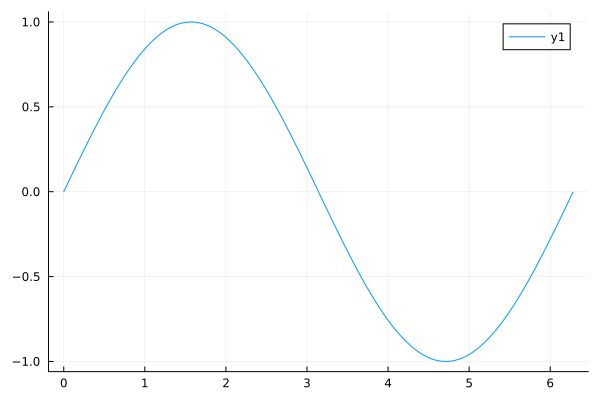

In [27]:
using Plots
x = 0:0.01:2π
y = sin.(x)
z = x, y
plot(z)

In [28]:
range(0, length=10, stop=10)

0.0:1.1111111111111112:10.0

In [29]:
findmax([1, 2, 5, 3])
maximum(abs, [1, -2 + 8im, 5im, 3])

8.246211251235321

In [30]:
using LinearAlgebra
A = [10 30im 0; 30 90 0; 0 0 20]
eig = eigen(A)
maxval, idx = findmax(abs, eig.values)
#eig.values[idx]

(92.08954958615486, 3)